# Feature Engineering and Selection
In this section, we perform feature engineering and selection to prepare the data for model training. The steps are as follows:

## Import Libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
import os

In [2]:


file_paths = {
    'archer': r'C:\Users\USER\IoT_Network_Traffic_Management\data\balanced\balanced_archer.csv',
    'camera': r'C:\Users\USER\IoT_Network_Traffic_Management\data\balanced\balanced_camera.csv',
    'indoor': r'C:\Users\USER\IoT_Network_Traffic_Management\data\balanced\balanced_indoor.csv'
}



## Function for feature engineering and selection

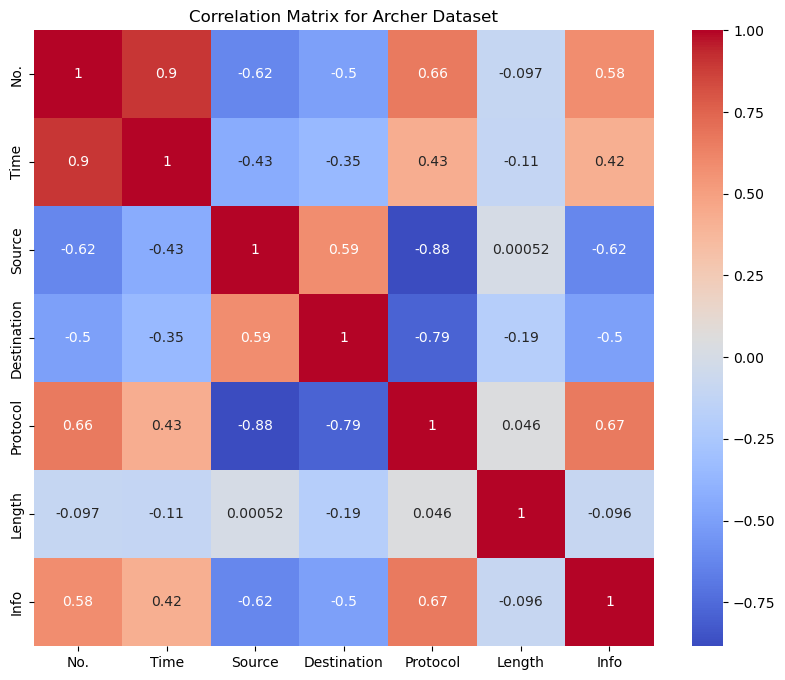

Mutual Information Scores for Archer Dataset:
 No.            0.690532
Info           0.673183
Source         0.670779
Length         0.646874
Time           0.622251
Protocol       0.596525
Destination    0.327137
dtype: float64


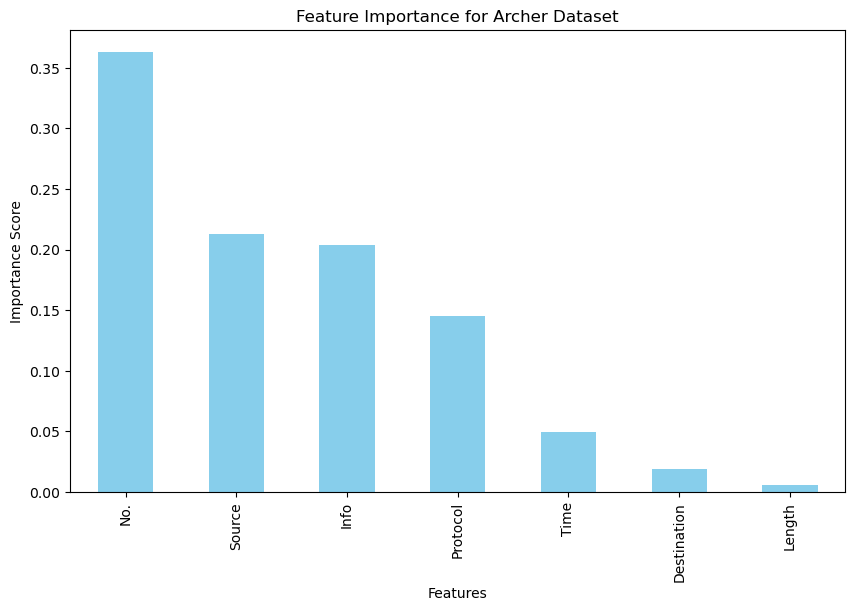

Feature Importances for Archer Dataset:
 No.            0.362993
Source         0.212949
Info           0.204038
Protocol       0.145451
Time           0.049687
Destination    0.018881
Length         0.006002
dtype: float64


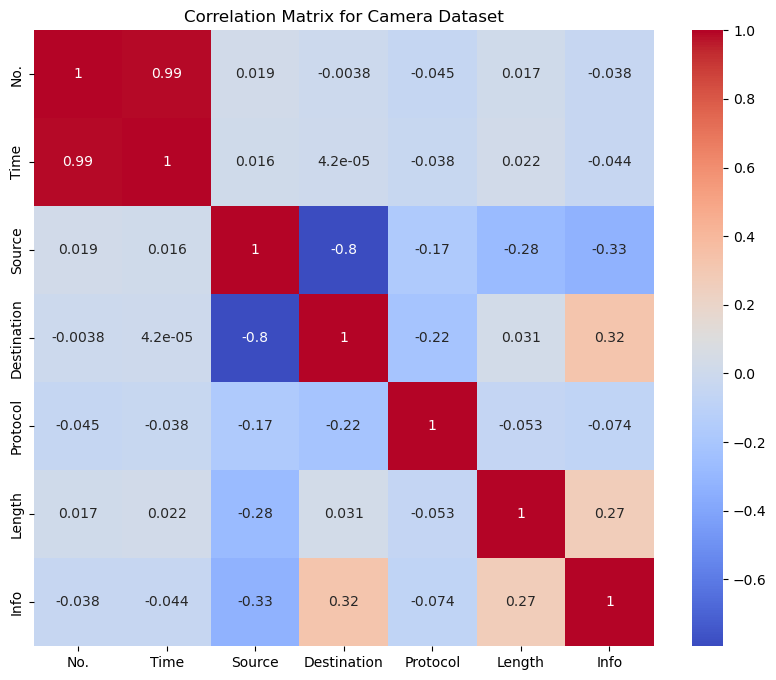

Mutual Information Scores for Camera Dataset:
 Time           0.635274
Info           0.462360
Length         0.057101
No.            0.035171
Destination    0.026961
Source         0.025115
Protocol       0.017284
dtype: float64


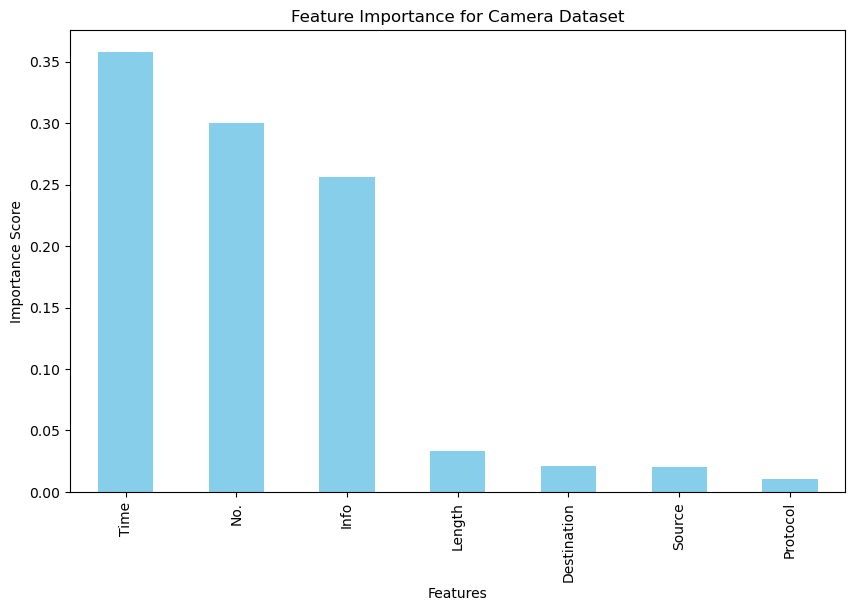

Feature Importances for Camera Dataset:
 Time           0.357825
No.            0.300388
Info           0.256160
Length         0.033211
Destination    0.021338
Source         0.020495
Protocol       0.010584
dtype: float64


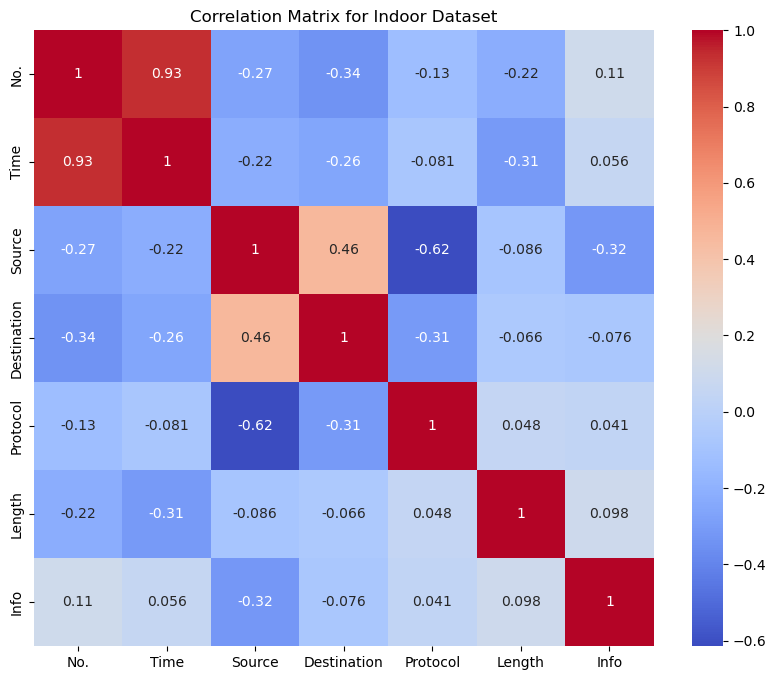

Mutual Information Scores for Indoor Dataset:
 No.            0.691440
Info           0.687575
Time           0.597910
Protocol       0.389696
Destination    0.368269
Length         0.349168
Source         0.282917
dtype: float64


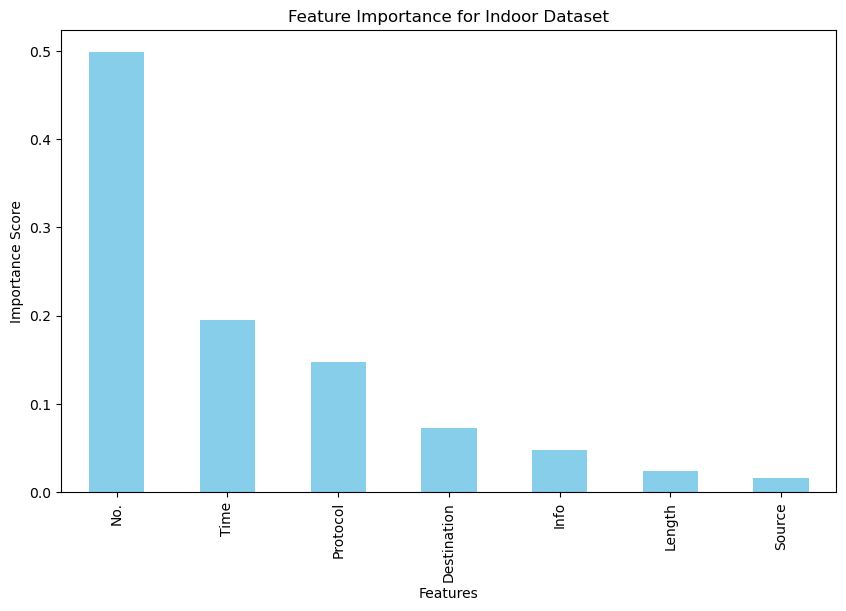

Feature Importances for Indoor Dataset:
 No.            0.499043
Time           0.194743
Protocol       0.146994
Destination    0.072999
Info           0.047258
Length         0.023382
Source         0.015581
dtype: float64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Paths to your preprocessed datasets
processed_file_paths = {
    'archer': r'C:\Users\USER\IoT_Network_Traffic_Management\data\balanced\balanced_archer.csv',
    'camera': r'C:\Users\USER\IoT_Network_Traffic_Management\data\balanced\balanced_camera.csv',
    'indoor': r'C:\Users\USER\IoT_Network_Traffic_Management\data\balanced\balanced_indoor.csv'
}

# Function to perform feature selection for each device dataset
def feature_selection(device_name):
    # Load the preprocessed dataset
    df = pd.read_csv(processed_file_paths[device_name])
    
    # Define features and target
    X = df.drop(columns=['label'])  # Exclude the target column
    y = df['label']  # Target column
    
    # 1. Correlation Matrix (Numerical Features)
    plt.figure(figsize=(10, 8))
    sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix for {device_name.capitalize()} Dataset")
    plt.show()

    # 2. Mutual Information (for categorical and numerical data)
    mi_selector = SelectKBest(mutual_info_classif, k="all")  # Test all features
    mi_selector.fit(X, y)
    mi_scores = pd.Series(mi_selector.scores_, index=X.columns)
    print(f"Mutual Information Scores for {device_name.capitalize()} Dataset:\n", mi_scores.sort_values(ascending=False))

    # Save Mutual Information scores to a CSV file
    mi_scores.to_csv(f'C:\\Users\\USER\\IoT_Network_Traffic_Management\\results\\mi_scores_{device_name}.csv', index=True)
    
    # 3. Feature Importance using Random Forest
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    rf_model = RandomForestClassifier(random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Get feature importances
    feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
    feature_importances.sort_values(ascending=False, inplace=True)
    
    # Plot feature importances
    plt.figure(figsize=(10, 6))
    feature_importances.plot(kind='bar', color='skyblue')
    plt.title(f"Feature Importance for {device_name.capitalize()} Dataset")
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.show()
    
    print(f"Feature Importances for {device_name.capitalize()} Dataset:\n", feature_importances)

    # Save Feature Importances to a CSV file
    feature_importances.to_csv(f'C:\\Users\\USER\\IoT_Network_Traffic_Management\\results\\feature_importances_{device_name}.csv', index=True)

# Perform feature selection for each device dataset
for device in ['archer', 'camera', 'indoor']:
    feature_selection(device)


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(


Feature-selected dataset saved to C:\Users\USER\IoT_Network_Traffic_Management\data\feature\selected_archer.csv
Feature-selected dataset saved to C:\Users\USER\IoT_Network_Traffic_Management\data\feature\selected_camera.csv


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=7. All the features will be returned.
  warnings.warn(


Feature-selected dataset saved to C:\Users\USER\IoT_Network_Traffic_Management\data\feature\selected_indoor.csv
